In [39]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

from sklearn.datasets import make_regression


In [105]:
class LoadData():
    def __init__(self):
    

        sample_size = 20
        self.x_train, self.y_train = make_regression(n_samples=sample_size, n_features=1, noise=0.01)
        
        plt.scatter(self.x_train, self.y_train)
        plt.show()
        self.y_train = np.array(self.y_train).reshape(sample_size,1)
        self.x_train = np.array(self.x_train)
        
        self.x_train = torch.tensor(self.x_train,dtype=torch.float)
        self.y_train = torch.tensor(self.y_train,dtype=torch.float)
        
        
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


class DefineModel():
    def __init__(self):
        self.model = LinearRegression()
        self.optimizer = torch.optim.SGD(self.model.parameters(),lr=1e-4)
        self.loss_func = nn.MSELoss()
        
    def run(self,epochs,x_train,y_train):
        for epoch in range(epochs):
            inputs = x_train
            targets = y_train
            
            '''Forward Propogation'''
            outputs = self.model(inputs)
            loss = self.loss_func(outputs,targets)
            
            '''Backward Propogation'''
            self.optimizer.zero_grad()   # clear gradients for next train
            loss.backward()              # backpropagation, compute gradients
            self.optimizer.step()        # apply gradients
            if (epoch+1)%5000 ==0:
                predict = self.model(x_train)
                
                print('Epoch {}/{}, loss: {:.3f}'.format(epoch+1,epochs,loss.data.numpy()))
                plt.scatter(x_train.data.numpy(), x_train.data.numpy(), color='red')
                plt.plot(x_train.data.numpy(), predict.data.numpy(), color='blue', label='Fitting Line')
                plt.xlabel('loss: {:.3f}'.format(loss.data.numpy()))
                plt.show()
                
    def evaluation(self):
        self.model.eval()
        
    def prediction(self,x):
        with torch.no_grad():
            predict = self.model(x)
            self.predict = predict.data.numpy()
            
    def save_model(self):
        torch.save(self.model.state_dict(), './linear.pth')
        
    def plot_result(self,x,y_actual,y_predict):
        fig = plt.figure(figsize=(20, 10))
        plt.scatter(x.numpy(), y_actual.numpy(), color='red')
        plt.plot(x.numpy(), y_actual.numpy(),color='green', label='Original data')
        plt.plot(x.numpy(), y_predict,color='blue', label='Fitting Line')
        plt.legend() 
        plt.show()


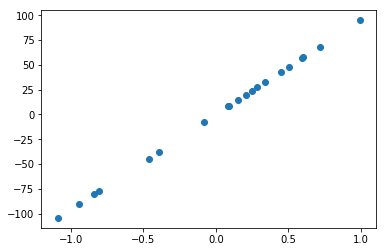

Epoch 5000/50000, loss: 1590.570


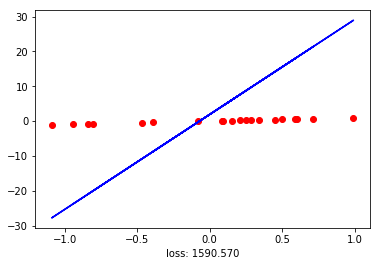

Epoch 10000/50000, loss: 807.210


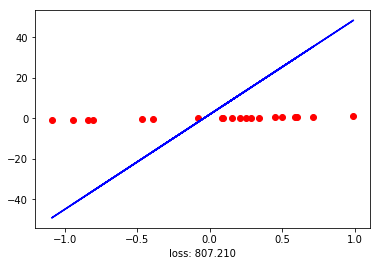

Epoch 15000/50000, loss: 409.952


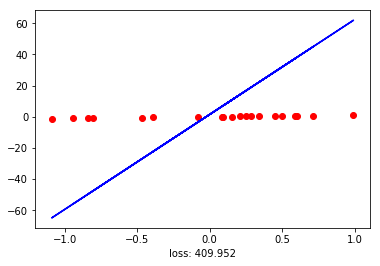

Epoch 20000/50000, loss: 208.240


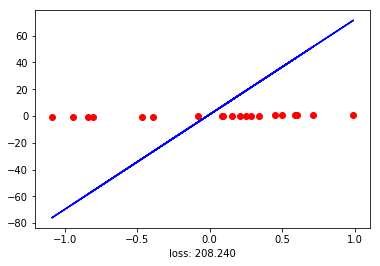

Epoch 25000/50000, loss: 105.783


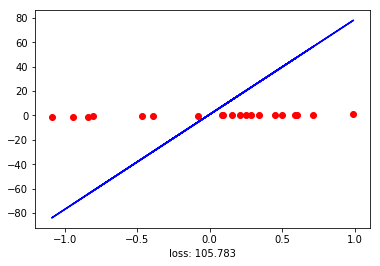

Epoch 30000/50000, loss: 53.738


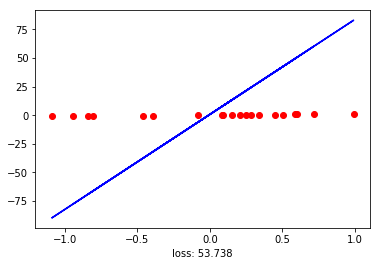

Epoch 35000/50000, loss: 27.298


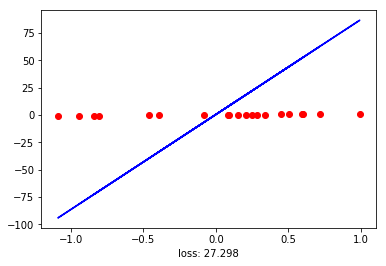

Epoch 40000/50000, loss: 13.868


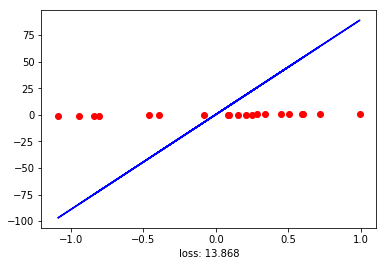

Epoch 45000/50000, loss: 7.045


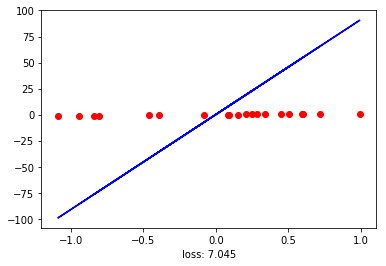

Epoch 50000/50000, loss: 3.579


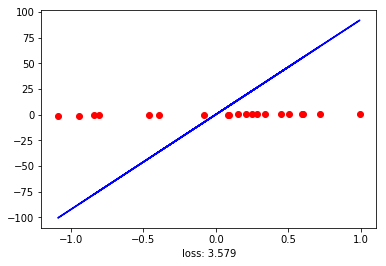

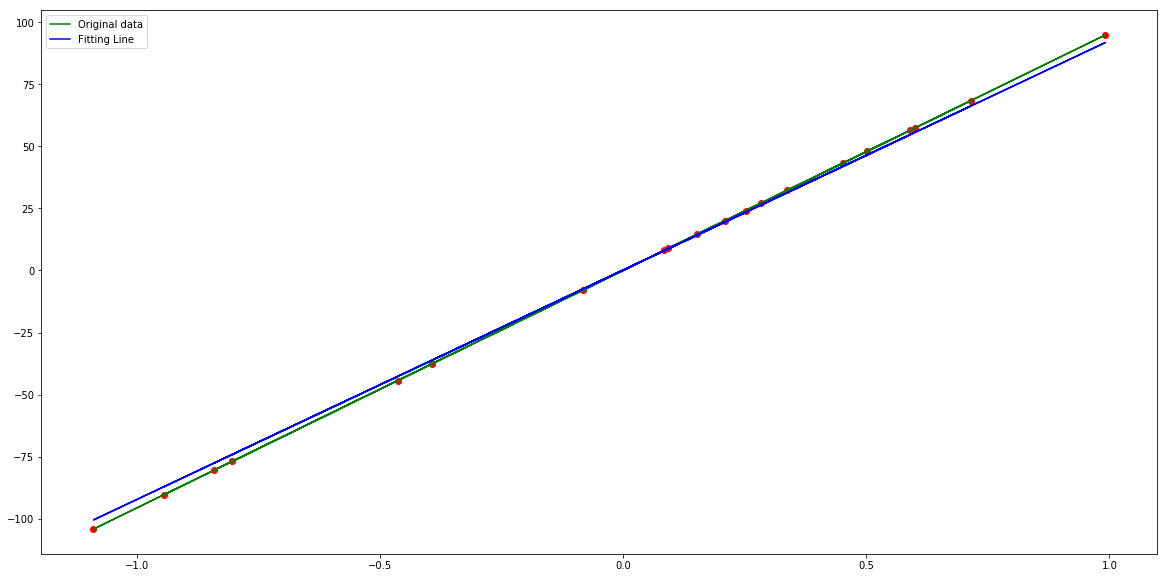

In [106]:
if __name__ == '__main__':
    ld = LoadData()
    df = DefineModel()
    df.run(50000,ld.x_train,ld.y_train)
    df.prediction(ld.x_train)
    df.plot_result(ld.x_train,ld.y_train,df.predict)